# 项目简介
使用1991-2020年全球气温月平均资料air.mon.ltm.1991-2020.nc，时间选择取1月（1991-2020年1月的平均），沿着120E切开，绘制“1991-2020年1月平均垂直温度剖面图（120E）”，对图片进行修饰以达到一定程度的美观


## 绘图要点：
(1)掌握垂直剖面图的概念及绘制方法

(2)坐标轴翻转（此处为y轴翻转）

(3)指定需要显示的y轴刻度（1000hPa,925hPa,850hPa,...）

(4)设置显示字体为“Times New Roman”

(5)图例刻度方向翻转

## 配套视频链接：
https://www.bilibili.com/video/BV1rF411K7Sn

## 1.导入需要的库&数据处理部分

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib.pyplot import MultipleLocator

C:\ProgramData\Anaconda3\lib\site-packages\xarray\backends\cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:
#导入文件
filename = r'C:\Users\LULU\Desktop\air\air.mon.ltm.1991-2020.nc'
f = xr.open_dataset(filename)

#查看文件信息
print(f)

<xarray.Dataset>
Dimensions:             (level: 17, lat: 73, lon: 144, time: 12, nbnds: 2)
Coordinates:
  * level               (level) float32 1e+03 925.0 850.0 ... 30.0 20.0 10.0
  * lat                 (lat) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:0...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    air                 (time, level, lat, lon) float32 ...
    valid_yr_count      (time, level, lat, lon) float32 ...
Attributes:
    Conventions:                    CF-1.0
    title:                          Monthly NCEP/DOE Reanalysis 2
    comments:                       Data is from \nNCEP/DOE AMIP-II Reanalysi...
    platform:                       Model
    source:                         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2...
    institution:         

C:\ProgramData\Anaconda3\lib\site-packages\xarray\backends\plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xarray\coding\times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


In [3]:
#提取变量level,lat,lon
level = f['level'].data
lat = f['lat'].data
lon = f['lon'].data

In [4]:
#找出120E的index

#方法1：转换成列表list
lon_list = list(lon)
print('方法1，120E:',lon_list.index(120))
print('check',lon[48])  #检查一下index48的位置是否为120E

#方法2：np.where函数
print('方法2，120E：',np.where(lon==120))
#n1 = np.where(lon==120)[0]
#print(type(n1))

方法1，120E: 48
check 120.0
方法2，120E： (array([48], dtype=int64),)


ps：个人平时更常用方法1，因为方法1直接返回的index是int格式（便于后续的切片），方法2返回的是元组格式（需要从元组中提取列表，再从列表中提取元素才是int格式）

In [5]:
#提取air00
air00 = f['air'].data[0,:,:,48]  #air(time, level, lat, lon)

#画图网格
X,Y = np.meshgrid(lat,level)

## 2.画一个最基础的垂直剖面图

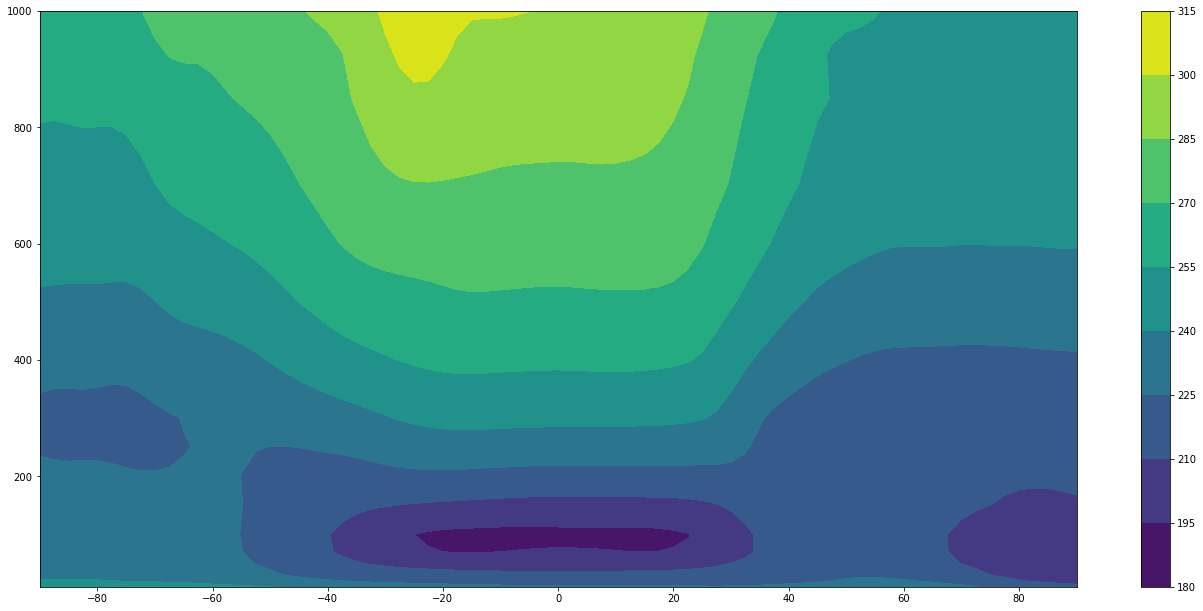

In [6]:
#画图
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_axes([0,0,1,1])
con1 = ax1.contourf(X,Y,air00)
fig.colorbar(con1)

## 3.画一个略复杂的垂直剖面图（在2.的基础上添加细节）

In [7]:
# 设置字体格式（Times New Roman）
plt.rc('font', family='Times New Roman')
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['axes.unicode_minus'] = True

C:\Users\LULU\AppData\Local\Temp/ipykernel_9608/1135489399.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['','90S','60S','30S','0','30N','60N','90N'],fontsize=30)


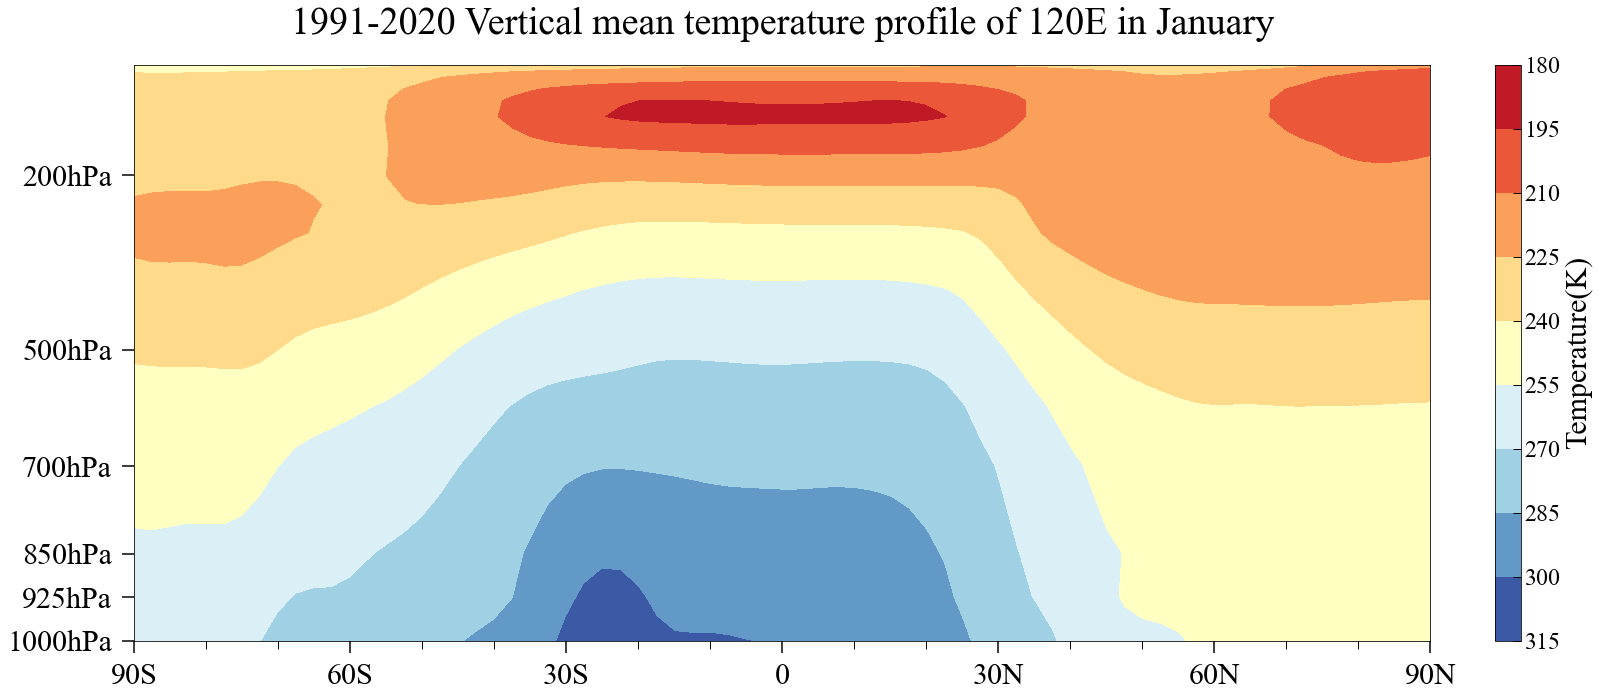

In [8]:
#画图
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_axes([0,0,1,1])
ax1.invert_yaxis()  #y轴反向
con1 = ax1.contourf(X,Y,air00,cmap='RdYlBu')

#坐标轴参数设置
ax1.xaxis.set_major_locator(MultipleLocator(30))
ax1.xaxis.set_minor_locator(MultipleLocator(10))
ax1.tick_params(axis='x',which='major',direction='out',length=12,width=1.5,pad=10)
ax1.tick_params(axis='x',which='minor',direction='out',length=8,width=1,pad=10)
ax1.set_xticklabels(['','90S','60S','30S','0','30N','60N','90N'],fontsize=30)
ax1.set_yticks([1000,925,850,700,500,200])
ax1.set_yticklabels(['1000hPa','925hPa','850hPa','700hPa','500hPa','200hPa'],fontsize=30)
ax1.tick_params(axis='y',which='major',direction='out',length=12,width=1.5,pad=10)

#标题
fig.suptitle('1991-2020 Vertical mean temperature profile of 120E in January',fontsize=38,y=1.1)

#设置colorbar
l,b,w,h = 1.05,0,0.02,1.0
rect = [l,b,w,h]
cbar_ax = fig.add_axes(rect)
cb = fig.colorbar(con1, cax = cbar_ax,orientation='vertical',ticklocation='right')
cb.set_label('Temperature(K)',fontsize=30)
cb.ax.tick_params(direction='in',length=8,width=1,labelsize=24);
cb.ax.invert_yaxis()  #colorbar反向